In [2]:
import numpy as np
import pandas as pd
from scipy.stats import trim_mean
from scipy.stats.mstats import mode, mquantiles
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline  
#%pylab inline

In [3]:
np.set_printoptions(precision=2)

# Problem 1: Descriptive Statistics and Probability Theory: Real Data on CEO Compensation

## Task1

In [9]:
df = pd.read_excel(r'E:\UCU\Statistics\As1\ceo.xls')

In [10]:
df = df.drop(df.columns[[7]], axis= 1)

In [11]:
df.head()

,salary,totcomp,tenure,age,sales,profits,assets
0,3030,8138,7,61,161315.0,2956.0,257389.0
1,6050,14530,0,51,144416.0,22071.0,237545.0
2,3571,7433,11,63,139208.0,4430.0,49271.0
3,3300,13464,6,60,100697.0,6370.0,92630.0
4,10000,68285,18,63,100469.0,9296.0,355935.0


In [12]:
np.shape(df)

(447, 7)

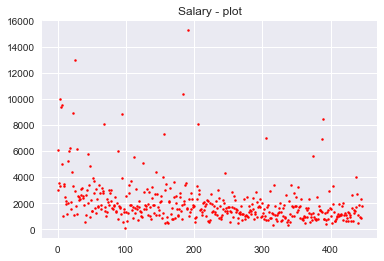

In [24]:
plt.plot(df['salary'],'ro', ms = 2.5)
_=plt.title('Salary - plot')

In [26]:
mean = np.mean(df)
trimmed_mean = trim_mean(df['salary'], 0.1)
lower_trimmed_quantile = mquantiles(df['salary'],)
trimmed_mean

1710.091922005571

In [27]:
df['salary'].describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

count      447.000000
mean      2027.516779
std       1722.566389
min        100.000000
10%        750.000000
25%       1084.000000
50%       1600.000000
75%       2347.500000
90%       3384.400000
max      15250.000000
Name: salary, dtype: float64

In [28]:
salary_as_array = df['salary'].values.reshape(len(df['salary'].values))
ecdf = ECDF(salary_as_array)

In [29]:
x = np.linspace(min(salary_as_array), max(salary_as_array))
y = ecdf(x)

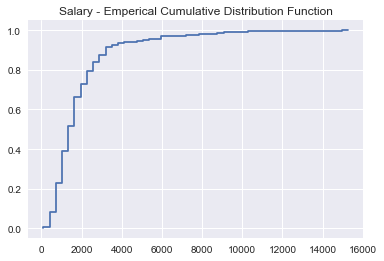

In [30]:
plt.step(x,y)
_=plt.title('Salary - Emperical Cumulative Distribution Function')

In [64]:
print (df['salary'].quantile(q=0.2), df['salary'].quantile(q=0.8), sep=", ")

976.2, 2613.0


Let's consider 
\begin{equation*}
\ F^{-1}(p)
\end{equation*}
as p-quantile
Then \begin{equation*}
\ F^{-1}(0.2)=976\\
\ F^{-1}(0.8)=2613\
\end{equation*}

In [33]:
print (ecdf(1000), 1-ecdf(5000))

0.223713646532 0.0536912751678


\begin{equation*}
\ F(1000)=0.22 \\ 
\ 1 - F(5000)=0.05 
\end{equation*}

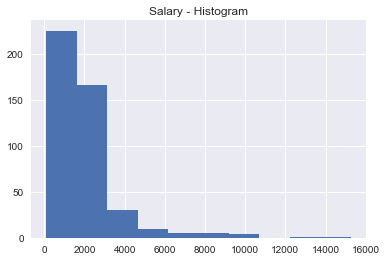

In [68]:
plt.hist(salary_as_array)
_=plt.title('Salary - Histogram')

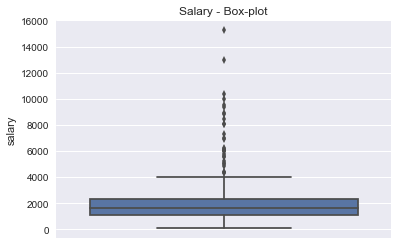

In [36]:
ax  = sns.boxplot(y=df['salary']).set_title('Salary - Box-plot')

**(C)** The data is left-skewed. So using arithmetic mean is not apppropriate, but median tells us that the distribution is left-skewed immediately if we take into attention at min(salary) and max(salary).
Also looking on 90% quantile and max/min we can conclude that there are very little (actually 10%) CEOs with salary between 3385 and 15250, which also leads to conclusion about skeweness.

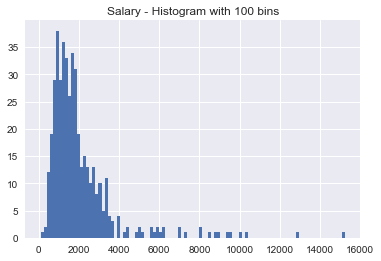

In [37]:
plt.hist(salary_as_array, bins = 100)
_=plt.title('Salary - Histogram with 100 bins')

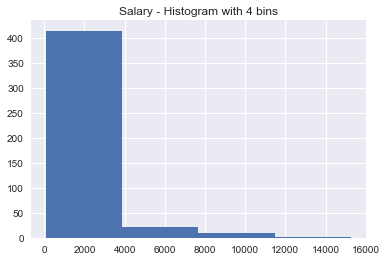

In [38]:
plt.hist(salary_as_array, bins = 4)
_=plt.title('Salary - Histogram with 4 bins')

**(D)** Function plt.hist() takes 10 bins by default.
<br>When the histogram is very detailed we can see that there are outliers with salary between 0 and 320 (which is readonable).
Histogram built at first is pretty rough so we couldn't see presence of those CEOs with small salary.
<br>The roughest histogram (with 4 bins) doen't lett us something more than we already know, as it shows (roughly) that most of salaries are between 0 and 4000. Whereas box-plot gave us better picture. 

In [39]:
ln_salary = np.log(salary_as_array)

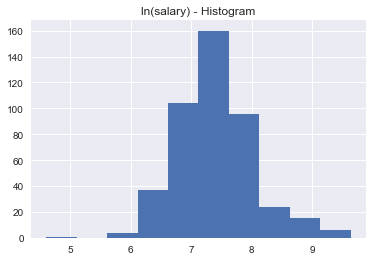

In [40]:
plt.hist(ln_salary)
_=plt.title('ln(salary) - Histogram')

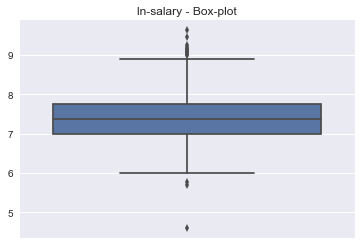

In [41]:
ax  = sns.boxplot(y=ln_salary).set_title('ln-salary - Box-plot')

From the plots above we can see that distribution of ln(salary) is almost symmetric. This means that original Salary has mean and median in appx e^7.4 and moving away from the median to the left and right we have almost the same decreasing dynamics of Salary. **BUT** as the scale is exponential, we understand that distance between 4 and 5 is less on the original scale than the distance between 8 and 9. Hence the conclusion that from the beginning of the board to median on original scale Salary growth much faster than it decreases after median - so original distribution of Salary is left-skewed.

## Task2

**(A)** Correlational coeficients od Pearsen:

In [42]:
corr = df.corr()
corr

,salary,totcomp,tenure,age,sales,profits,assets
salary,1.000000,0.322023,0.172449,0.119466,0.371256,0.370315,0.431036
totcomp,0.322023,1.000000,0.067998,0.016046,0.105999,0.139931,0.083237
tenure,0.172449,0.067998,1.000000,0.405901,-0.027743,-0.006263,0.057682
age,0.119466,0.016046,0.405901,1.000000,0.050350,0.049096,0.081185
sales,0.371256,0.105999,-0.027743,0.050350,1.000000,0.725970,0.518214
profits,0.370315,0.139931,-0.006263,0.049096,0.725970,1.000000,0.510889
assets,0.431036,0.083237,0.057682,0.081185,0.518214,0.510889,1.000000


In [69]:
corr.columns

Index(['salary', 'totcomp', 'tenure', 'age', 'sales', 'profits', 'assets'], dtype='object')

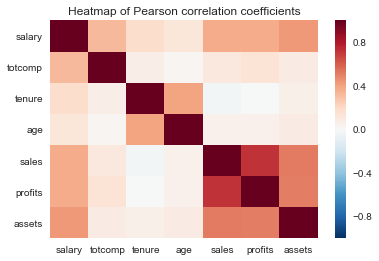

In [115]:
_=sns.heatmap(corr,  
                 xticklabels=list(corr.columns),
                 yticklabels=list(corr.columns)).set_title('Heatmap of Pearson correlation coefficients')

Salary correlates most with Assets and a little less with Sales and Profits. But correlation is weal even between Salary and Assets - 0.43 - that means that there is no strong dependency. The weakest correlations of Salary with Age and Tenure, which are actually related as the older is person the longertenure he can potentially have.<br>**Conclusion:** it doesn't matter how old is CEO, his salary is most dependent on how many assests does he have. 

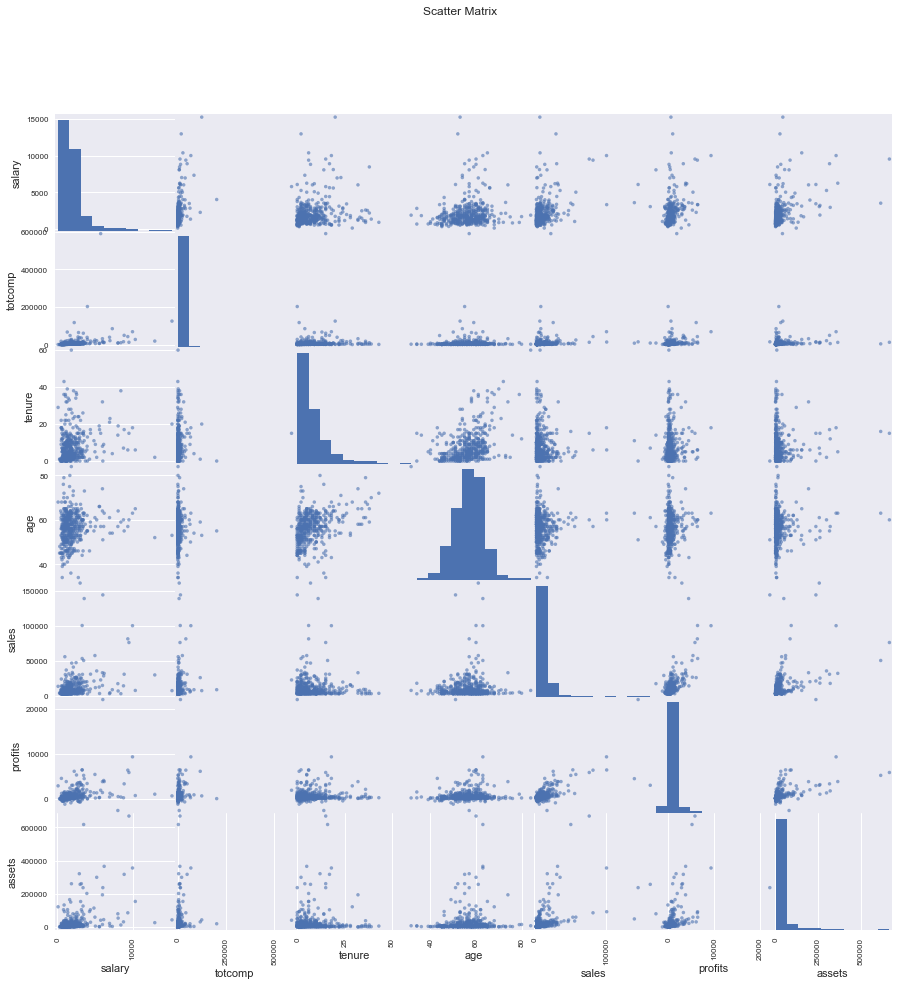

In [211]:
pd.plotting.scatter_matrix(df,  figsize = (15,15), alpha=0.6)
_=plt.suptitle('Scatter Matrix')

**(B)** Scatter plots confirm lack of strong dependency between Salary and other variables. The weak dependence is seen between Salary and Profits, Salary and Assets - the same as we concluded from correlation coefficients.<br><br>
Correlation coeficients give us a numerical meaasure of dependence between variables - that is why they are helpful 

In [79]:
from scipy.stats import spearmanr

In [80]:
spearman = spearmanr(df)[0]
spearman

array([[ 1.  ,  0.71,  0.19,  0.15,  0.42,  0.47,  0.43],
       [ 0.71,  1.  ,  0.19,  0.13,  0.36,  0.43,  0.4 ],
       [ 0.19,  0.19,  1.  ,  0.4 , -0.03,  0.01, -0.01],
       [ 0.15,  0.13,  0.4 ,  1.  , -0.03,  0.08,  0.08],
       [ 0.42,  0.36, -0.03, -0.03,  1.  ,  0.53,  0.58],
       [ 0.47,  0.43,  0.01,  0.08,  0.53,  1.  ,  0.64],
       [ 0.43,  0.4 , -0.01,  0.08,  0.58,  0.64,  1.  ]])

In [111]:
list(corr.columns)

['salary', 'totcomp', 'tenure', 'age', 'sales', 'profits', 'assets']

In [ ]:
, yticklabels=corr

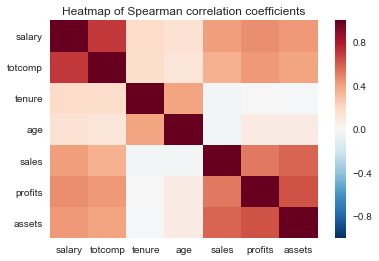

In [114]:
ax = sns.heatmap(spearman, 
                 xticklabels=list(corr.columns),
                 yticklabels=list(corr.columns)).set_title('Heatmap of Spearman correlation coefficients')

From Spearman's correlation coefficients we can see that Salary has high monotonic relationship with Total Compensation, so when Salary grows, the total compensation grows as well and vice versa. Whereas this relation is non linear as Pearson's correlation coefficient between Salary and Total Compensation is low.<br><br>
The rank of Salary=6000 is 429.5
There are 2 such observations with Salary = 600, but they have different Total compensation (2 times difference) and different tenure (4 times difference). Which says that Total compensation is dependent not only on Salary.

In [48]:
df_rank = df.rank()

In [49]:
salary_60000 = df.query('salary == 6000')

In [50]:
salary_60000

,salary,totcomp,tenure,age,sales,profits,assets
17,6000,31208,32,74,33296.0,3765.6,194398.0
88,6000,14699,8,64,15128.0,1331.0,15560.0


In [51]:
df_rank['salary'][88]

429.5

In [128]:
younger_than_50 = df.query('age<50')
older_than_50 = df.query('age>=50')

In [130]:
print ('number of CEOs younger than 50 y.o. {}\nnumber of CEOs older than 50 or of age of 50  y.o. {}'.format(np.shape(younger_than_50)[0],np.shape(older_than_50)[0]))

number of CEOs younger than 50 y.o. 62
number of CEOs older than 50 or of age of 50  y.o. 385


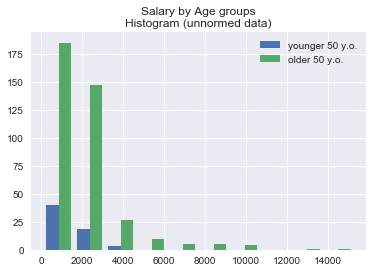

In [132]:
plt.hist([younger_than_50['salary'],older_than_50['salary']], label =['younger 50 y.o.', 'older 50 y.o.'])
plt.legend()
_=plt.title('Salary by Age groups\nHistogram (unnormed data)')

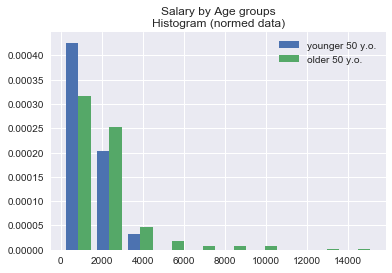

In [133]:
plt.hist([younger_than_50['salary'],older_than_50['salary']], label =['younger 50 y.o.', 'older 50 y.o.'], normed=1)
plt.legend()
_=plt.title('Salary by Age groups\nHistogram (normed data)')

In [135]:
salary_ar_younger = younger_than_50['salary'].values.reshape(len(younger_than_50['salary'].values))
salary_ar_older = older_than_50['salary'].values.reshape(len(older_than_50['salary'].values))

ecdf_younger = ECDF(salary_ar_younger)
ecdf_older = ECDF(salary_ar_older)

y_younger = ecdf_younger(x)
y_older = ecdf_older(x)


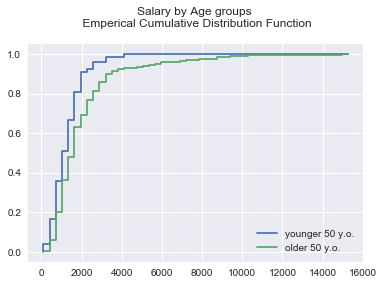

In [118]:
plt.step(x,y_younger, label ='younger 50 y.o.')
_=plt.step(x,y_older, label ='older 50 y.o.')
_=plt.title('Salary by Age groups \n Emperical Cumulative Distribution Function\n')
_=plt.legend()

What
can we learn from the corresponding location and dispersion (!) measures?

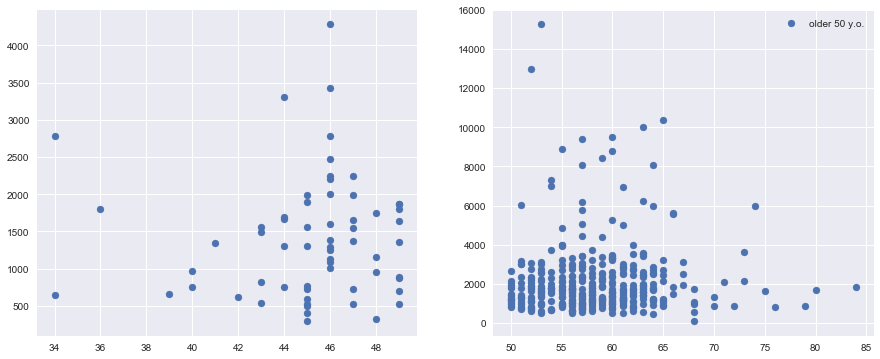

In [241]:
f, (ax1,ax2) = plt.subplots(ncols=2,nrows=1)
ax1.scatter(younger_than_50['age'],younger_than_50['salary'], label = 'younger 50 y.o.')
ax2.scatter(older_than_50['age'],older_than_50['salary'],label = 'older 50 y.o.')
plt.legend()
f.set_figheight(6)
f.set_figwidth(15)

In [144]:
df['age_cat']=np.where(df['age']<50,'A1','A2')

conditions = [df['salary']<2000, np.logical_and(df['salary']>=2000, df['salary']<4000) , df['salary']>=4000]
choices = ['S1', 'S2', 'S3']
df['salary_cat']=np.select(conditions,choices)

In [145]:
df.head()

,salary,totcomp,tenure,age,sales,profits,assets,age_cat,salary_cat
0,3030,8138,7,61,161315.0,2956.0,257389.0,A2,S2
1,6050,14530,0,51,144416.0,22071.0,237545.0,A2,S3
2,3571,7433,11,63,139208.0,4430.0,49271.0,A2,S2
3,3300,13464,6,60,100697.0,6370.0,92630.0,A2,S2
4,10000,68285,18,63,100469.0,9296.0,355935.0,A2,S3


In [156]:
#table of age vs salary
age_salary = pd.crosstab(index=df['age_cat'], columns=df['salary_cat'], margins=True)
age_salary.columns=('S1', 'S2', 'S3','rowtotal')
age_salary.index=('A1','A2','coltotal')
print("Absolute frequency contingency table")
age_salary

Absolute frequency contingency table


,S1,S2,S3,rowtotal
A1,52,9,1,62
A2,248,107,30,385
coltotal,300,116,31,447


In [158]:
age_salary_relative = age_salary/np.shape(df)[0]
print("Relative frequency contingency table")
age_salary_relative

Relative frequency contingency table


,S1,S2,S3,rowtotal
A1,0.116331,0.020134,0.002237,0.138702
A2,0.554810,0.239374,0.067114,0.861298
coltotal,0.671141,0.259508,0.069351,1.000000


**(C)**\begin{equation*}
			n_{12}=9 -there\,are\,9\,CEOs\,in\,data\,set\,who\,are\,younger\,than\,50\,y.o,\,and\,whose\,salary\in[2000,4000)\\
            h_{12}=2\% - these\,CEOs\,represent\,2\%\,of\,total\,number\,of\,CEOs\,in\,data\,set\\
            n_{1}=62 - there\,are\,62\,CEOs\,in\,data\,set\,who\,are\,younger\,than\,50\,y.o,\\ 
            h_{1}=14\% - these\,CEOs\,represent\,14\%\,of\,total\,number\,of\,CEOs\,in\,data\,set\\
			\end{equation*}

**(D)** Will use Chi square test t find dependence measure.<br><br>
Expected frequences for each category

In [197]:
from scipy.stats import chi2_contingency

# to get rid of row/column totals as they are considered as parts of observations
observed = pd.crosstab(index=df['age_cat'], columns=df['salary_cat'])
chi2, p, dof, expected = chi2_contingency(observed)

In [200]:
print ('So the dependency measure between Age_by_groups and Salary_by_groups is', chi2)
print ("Taking into account that hte p-value of the Chi test is",p,"we\ncan conclude that \
Age_by_groups and Salary_by_groups are dependent!\n\nLet's find also Corrected contingency \
coefficient of Pearson as it is normalised and \nthat is why more suitable for making conclusions")

So the dependency measure between Age_by_groups and Salary_by_groups is 9.57873369657
Taking into account that hte p-value of the Chi test is 0.00831772209509 we
can conclude that Age_by_groups and Salary_by_groups are dependent!

Let's find also Corrected contingencycoefficient of Pearson as it is normalised and 
that is why more suitable for making conclusions


In [207]:
from math import sqrt
C = sqrt(chi2/(chi2+observed.sum().sum()))
C_max = sqrt((2-1)/2)
C_corr = C/C_max
C_corr

0.2048383212335549

Corrected contingency coefficient of Pearson is 0.2048 which is higher than correlational coefficints of Person and Spearman for ungrouped Age and Salary. This means that if we divide CEOs by age groups and salaries, we get better vision of dependency as salaries of CEOs younger than 50 are really correlate with age and by the way are all less than 4000. On the other hand salaries of those who are older than 50 are mostly in range of 1000-4000. Moreover almost all the CEOs who are older 67 y.o have salary lower than 4000  which affects hypothesis of growing salary with age.<br><br>
And **conclusion**: Salary grows with age till some threshold, then Salary doesn't grow higher for most of the CEOs. 